<a href="https://colab.research.google.com/github/AfifaMasood/AfifaMasood/blob/main/HybridModel_CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow opencv-python tqdm numpy

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm  # For progress bar


import tensorflow as tf
tf.config.run_functions_eagerly(True)


# Load MobileNet model pre-trained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from a single frame
def extract_frame_features(frame):
    frame = cv2.resize(frame, (224, 224))  # Resize frame to MobileNet input size
    frame = preprocess_input(frame)  # Preprocess frame
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    features = model.predict(frame, verbose=0)  # Extract features
    return features.flatten()  # Flatten features to 1D array

# Function to extract features from a video
def extract_video_features(video_path, max_frames=None):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    video_features = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Extract features from the current frame
        frame_features = extract_frame_features(frame)
        video_features.append(frame_features)
        frame_count += 1
        # Stop if we have reached the maximum number of frames
        if max_frames is not None and frame_count >= max_frames:
            break

    cap.release()
    return np.array(video_features)  # Return as a numpy array

# Function to process the entire dataset with subfolders
def process_dataset_with_subfolders(dataset_path, output_dir, max_frames_per_video=None):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get list of subfolders (e.g., normal, shoplifting)
    subfolders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    print(f"Found {len(subfolders)} subfolders: {subfolders}")

    # Process each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(dataset_path, subfolder)
        output_subfolder = os.path.join(output_dir, subfolder)

        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        # Get list of video files in the subfolder
        video_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.mp4', '.avi', '.mov'))]
        print(f"Found {len(video_files)} videos in subfolder: {subfolder}")

        # Process each video in the subfolder
        for video_file in tqdm(video_files, desc=f"Processing {subfolder}"):
            video_path = os.path.join(subfolder_path, video_file)
            # Extract features from the video
            features = extract_video_features(video_path, max_frames=max_frames_per_video)
            # Save features to a file
            output_file = os.path.join(output_subfolder, f"{os.path.splitext(video_file)[0]}_features.npy")
            np.save(output_file, features)

    print("Feature extraction complete. Features saved to:", output_dir)

# Example usage
dataset_path = "/content/drive/MyDrive/FYP Dataset 2"  # Replace with the path to your video dataset
output_dir = "/content/drive/MyDrive/output_features_mobile"  # Directory to save extracted features
max_frames_per_video = 100  # Optional: Limit the number of frames per video

# Process the entire dataset with subfolders
process_dataset_with_subfolders(dataset_path, output_dir, max_frames_per_video=max_frames_per_video)

<ipython-input-4-ea192d7ea745>:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, pooling='avg')


Found 2 subfolders: ['Shoplifting', 'Normal']
Found 131 videos in subfolder: Shoplifting


Processing Shoplifting:   0%|          | 0/131 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
Processing Shoplifting: 100%|██████████| 131/131 [36:24<00:00, 16.68s/it]


Found 131 videos in subfolder: Normal


Processing Normal: 100%|██████████| 131/131 [40:40<00:00, 18.63s/it]

Feature extraction complete. Features saved to: /content/drive/MyDrive/output_features_mobile


Loaded 262 samples with labels: ['Normal' 'Shoplifting']
Data shape: X = (242, 20, 102400), y = (242, 2)
Training data: X_train = (193, 20, 102400), y_train = (193, 2)
Testing data: X_test = (49, 20, 102400), y_test = (49, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 20, 128)             │      52,494,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,548,546 (200.46 MB)

 Trainable params: 52,548,546 (200.46 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.5521 - loss: 0.6947 - val_accuracy: 0.9796 - val_loss: 0.5300
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.8013 - loss: 0.5387 - val_accuracy: 0.9388 - val_loss: 0.4018
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9137 - loss: 0.4225 - val_accuracy: 0.8980 - val_loss: 0.2487
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9263 - loss: 0.2487 - val_accuracy: 0.9388 - val_loss: 0.1939
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9771 - loss: 0.1316 - val_accuracy: 0.9388 - val_loss: 0.1468
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 11s/step - accuracy: 0.9599 - loss: 0.1151 - val_accuracy: 0.9592 - val_loss: 0.0830
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9727 - loss: 0.0822 - val_accuracy: 0.9388 - val_loss: 0.1670
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9629 - loss: 0.0758 - val_accuracy: 0.9184 - val_loss: 0.1708


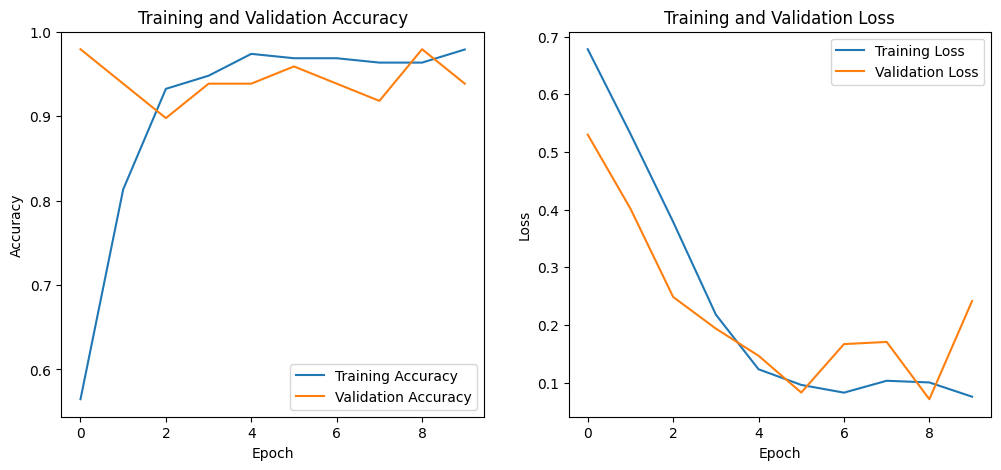

Test Accuracy: 93.88%
Test Loss: 0.2416
Model saved as 'mobileNet_lstm_action_recognition_model.h5'
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


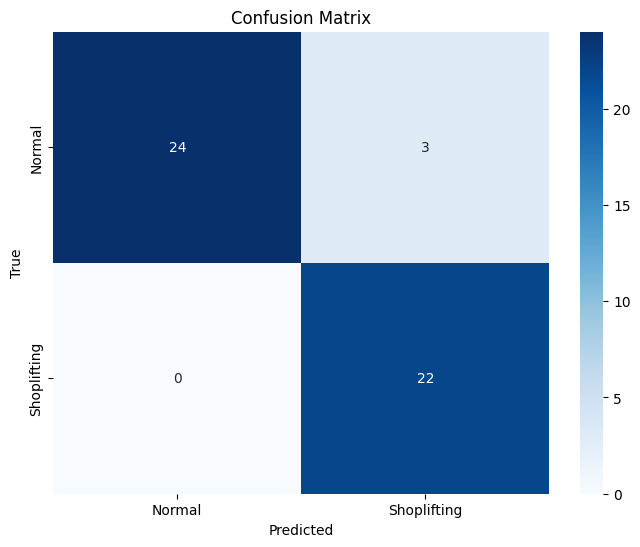

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt  # For plotting
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For confusion matrix visualization

# Load extracted features and labels
def load_features_and_labels(features_dir):
    features = []
    labels = []

    # Iterate through subfolders (e.g., normal, shoplifting)
    for subfolder in os.listdir(features_dir):
        subfolder_path = os.path.join(features_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Iterate through feature files in the subfolder
            for feature_file in os.listdir(subfolder_path):
                if feature_file.endswith('.npy'):
                    feature_path = os.path.join(subfolder_path, feature_file)
                    # Load features
                    feature = np.load(feature_path)
                    features.append(feature)
                    # Use subfolder name as label
                    labels.append(subfolder)

    # Find the maximum number of frames in the dataset
    max_frames = max([f.shape[0] for f in features])

    # Pad or truncate features to have the same number of frames
    for i in range(len(features)):
        if features[i].shape[0] < max_frames:
            # Pad with zeros if the number of frames is less than max_frames
            padding = np.zeros((max_frames - features[i].shape[0], features[i].shape[1]))
            features[i] = np.vstack((features[i], padding))
        else:
            # Truncate if the number of frames is greater than max_frames
            features[i] = features[i][:max_frames]

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Prepare data for LSTM
def prepare_data(features, labels, sequence_length=20):
    X, y = [], []

    # Encode labels to integers
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_onehot = to_categorical(labels_encoded)

    # Create sequences
    for i in range(len(features) - sequence_length):
        # Flatten the feature if there's an extra dimension
        feature = features[i:i + sequence_length]
        feature = feature.reshape((sequence_length, -1))  # Flatten the features (merge 100 and 1024)
        X.append(feature)
        y.append(labels_onehot[i + sequence_length])

    X = np.array(X)
    y = np.array(y)

    return X, y, label_encoder


# Build LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))  # First LSTM layer
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))  # Second LSTM layer
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot training and validation accuracy/loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main function
def main():
    # Path to the directory containing extracted features
    features_dir = "/content/drive/MyDrive/output_features_mobile"  # Replace with your path
    sequence_length = 20  # Number of frames in a sequence

    # Load features and labels
    features, labels = load_features_and_labels(features_dir)
    print(f"Loaded {len(features)} samples with labels: {np.unique(labels)}")

    # Prepare data for LSTM
    X, y, label_encoder = prepare_data(features, labels, sequence_length=sequence_length)
    print(f"Data shape: X = {X.shape}, y = {y.shape}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data: X_train = {X_train.shape}, y_train = {y_train.shape}")
    print(f"Testing data: X_test = {X_test.shape}, y_test = {y_test.shape}")

    # Build LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, feature_dim)
    num_classes = y_train.shape[1]  # Number of unique classes
    model = build_lstm_model(input_shape, num_classes)
    model.summary()

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,  # Number of epochs
        batch_size=32,  # Batch size
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Plot training and validation accuracy/loss
    plot_training_history(history)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Save the model
    model.save('/content/drive/MyDrive/mobileNet_lstm_action_recognition_model.h5')
    print("Model saved as 'mobileNet_lstm_action_recognition_model.h5'")

    # Generate predictions for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

    # Plot confusion matrix
    class_names = label_encoder.classes_  # Get class names (e.g., normal, shoplifting)
    plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)

# Run the main function
if __name__ == "__main__":
    main()

Loaded 262 samples with labels: ['Normal' 'Shoplifting']
Data shape: X = (242, 20, 102400), y = (242, 2)
Training data: X_train = (193, 20, 102400), y_train = (193, 2)
Testing data: X_test = (49, 20, 102400), y_test = (49, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 20, 128)             │      52,494,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,548,546 (200.46 MB)

 Trainable params: 52,548,546 (200.46 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.4695 - loss: 0.7059 - val_accuracy: 0.8980 - val_loss: 0.5728
Epoch 2/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.7978 - loss: 0.5339 - val_accuracy: 0.8776 - val_loss: 0.3803
Epoch 3/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.8723 - loss: 0.3885 - val_accuracy: 0.9388 - val_loss: 0.2458
Epoch 4/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9507 - loss: 0.2372 - val_accuracy: 0.9184 - val_loss: 0.2346
Epoch 5/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9283 - loss: 0.2250 - val_accuracy: 0.9184 - val_loss: 0.1827
Epoch 6/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9527 - loss: 0.1371 - val_accuracy: 0.8980 - val_loss: 0.2964
Epoch 7/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.9421 - loss: 0.1628 - val_accuracy: 0.9388 - val_loss: 0.2321
Epoch 8/65
7/7 ━━━━━━━━━━━━━━━━━━━━ 76s 11s/step - accuracy: 0.8650 - loss: 0.2973 - val_accuracy: 0.8571 - val_loss: 0.3258


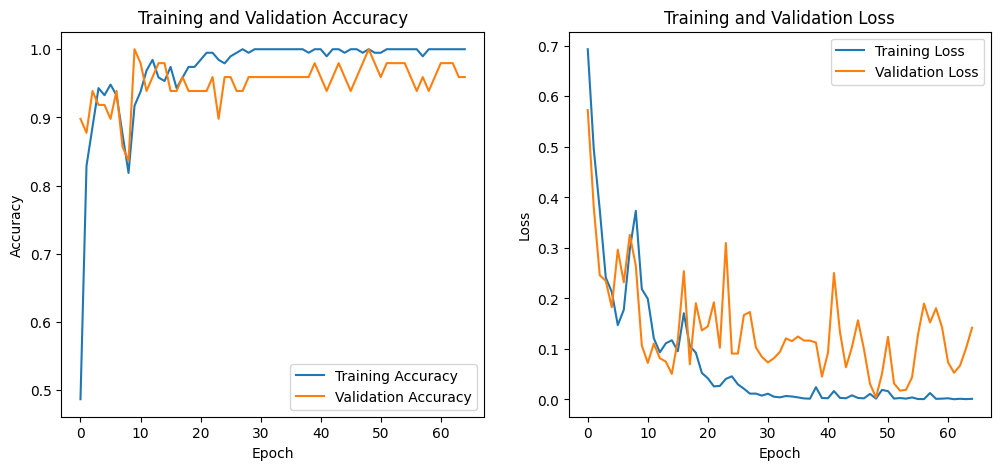

Test Accuracy: 95.92%
Test Loss: 0.1421
Model saved as 'mobileNet_lstm_action_recognition_model_increase_epoches.h5'
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


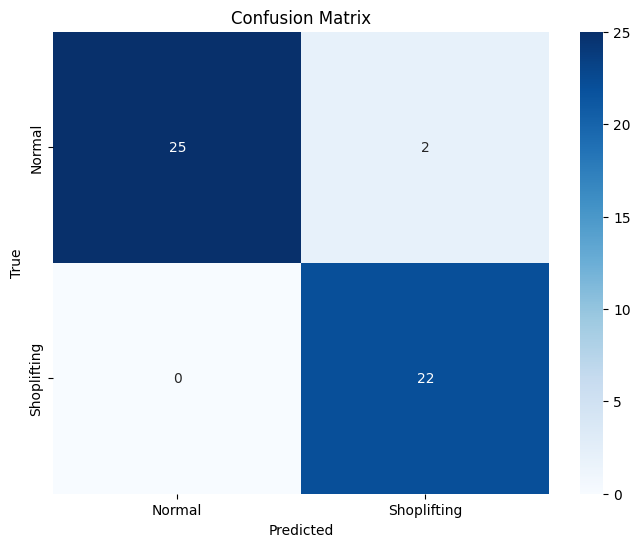

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt  # For plotting
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For confusion matrix visualization

# Load extracted features and labels
def load_features_and_labels(features_dir):
    features = []
    labels = []

    # Iterate through subfolders (e.g., normal, shoplifting)
    for subfolder in os.listdir(features_dir):
        subfolder_path = os.path.join(features_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Iterate through feature files in the subfolder
            for feature_file in os.listdir(subfolder_path):
                if feature_file.endswith('.npy'):
                    feature_path = os.path.join(subfolder_path, feature_file)
                    # Load features
                    feature = np.load(feature_path)
                    features.append(feature)
                    # Use subfolder name as label
                    labels.append(subfolder)

    # Find the maximum number of frames in the dataset
    max_frames = max([f.shape[0] for f in features])

    # Pad or truncate features to have the same number of frames
    for i in range(len(features)):
        if features[i].shape[0] < max_frames:
            # Pad with zeros if the number of frames is less than max_frames
            padding = np.zeros((max_frames - features[i].shape[0], features[i].shape[1]))
            features[i] = np.vstack((features[i], padding))
        else:
            # Truncate if the number of frames is greater than max_frames
            features[i] = features[i][:max_frames]

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Prepare data for LSTM
def prepare_data(features, labels, sequence_length=20):
    X, y = [], []

    # Encode labels to integers
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_onehot = to_categorical(labels_encoded)

    # Create sequences
    for i in range(len(features) - sequence_length):
        # Flatten the feature if there's an extra dimension
        feature = features[i:i + sequence_length]
        feature = feature.reshape((sequence_length, -1))  # Flatten the features (merge 100 and 1024)
        X.append(feature)
        y.append(labels_onehot[i + sequence_length])

    X = np.array(X)
    y = np.array(y)

    return X, y, label_encoder


# Build LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))  # First LSTM layer
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))  # Second LSTM layer
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot training and validation accuracy/loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main function
def main():
    # Path to the directory containing extracted features
    features_dir = "/content/drive/MyDrive/output_features_mobile"  # Replace with your path
    sequence_length = 20  # Number of frames in a sequence

    # Load features and labels
    features, labels = load_features_and_labels(features_dir)
    print(f"Loaded {len(features)} samples with labels: {np.unique(labels)}")

    # Prepare data for LSTM
    X, y, label_encoder = prepare_data(features, labels, sequence_length=sequence_length)
    print(f"Data shape: X = {X.shape}, y = {y.shape}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data: X_train = {X_train.shape}, y_train = {y_train.shape}")
    print(f"Testing data: X_test = {X_test.shape}, y_test = {y_test.shape}")

    # Build LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])  # (sequence_length, feature_dim)
    num_classes = y_train.shape[1]  # Number of unique classes
    model = build_lstm_model(input_shape, num_classes)
    model.summary()

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=65,  # Number of epochs
        batch_size=32,  # Batch size
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Plot training and validation accuracy/loss
    plot_training_history(history)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Save the model
    model.save('/content/drive/MyDrive/mobileNet_lstm_action_recognition_model_increase_epoches.h5')
    print("Model saved as 'mobileNet_lstm_action_recognition_model_increase_epoches.h5'")

    # Generate predictions for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

    # Plot confusion matrix
    class_names = label_encoder.classes_  # Get class names (e.g., normal, shoplifting)
    plot_confusion_matrix(y_true_classes, y_pred_classes, class_names)

# Run the main function
if __name__ == "__main__":
    main()

Loaded 262 samples with labels: ['Normal' 'Shoplifting']
Data shape: X = (262, 100, 1024), y = (262, 2)
Training data: X_train = (209, 100, 1024), y_train = (209, 2)
Testing data: X_test = (53, 100, 1024), y_test = (53, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,034 (2.46 MB)

 Trainable params: 644,034 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5880 - loss: 0.6687 - val_accuracy: 0.8302 - val_loss: 0.5002
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7577 - loss: 0.4951 - val_accuracy: 0.8302 - val_loss: 0.3675
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7813 - loss: 0.4050 - val_accuracy: 0.7925 - val_loss: 0.3672
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8652 - loss: 0.3339 - val_accuracy: 0.7925 - val_loss: 0.3832
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8937 - loss: 0.2695 - val_accuracy: 0.7925 - val_loss: 0.4019
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8812 - loss: 0.2390 - val_accuracy: 0.6792 - val_loss: 0.5526
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8395 - loss: 0.3551 - val_accuracy: 0.8302 - val_loss: 0.4344
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8710 - loss: 0.2869 - val_accuracy: 0.7736 - val_loss: 0.3801
Epoch 9/

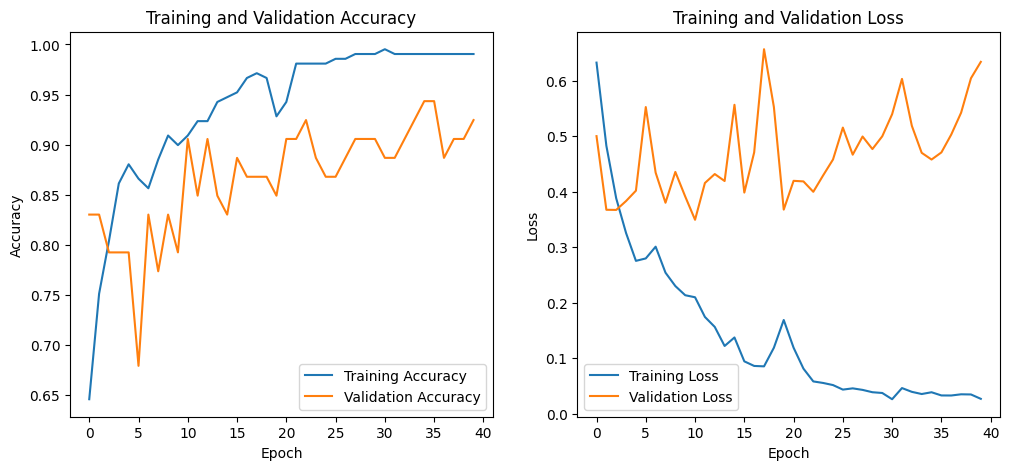

Test Accuracy: 92.45%
Test Loss: 0.6341
Model saved successfully.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step


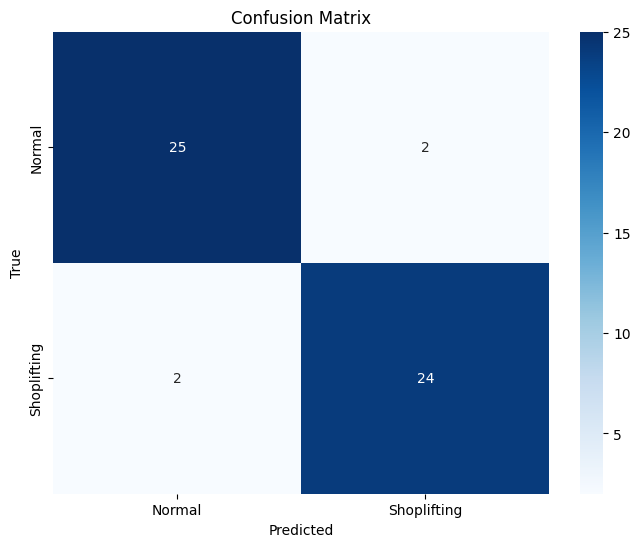

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt  # For plotting
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For confusion matrix visualization

# Load extracted features and labels
def load_features_and_labels(features_dir):
    features = []
    labels = []

    for subfolder in os.listdir(features_dir):
        subfolder_path = os.path.join(features_dir, subfolder)
        if os.path.isdir(subfolder_path):
            for feature_file in os.listdir(subfolder_path):
                if feature_file.endswith('.npy'):
                    feature_path = os.path.join(subfolder_path, feature_file)
                    feature = np.load(feature_path)  # Shape: (num_frames, feature_dim)
                    features.append(feature)
                    labels.append(subfolder)

    max_frames = max([f.shape[0] for f in features])

    # Pad sequences to match the longest one
    for i in range(len(features)):
        if features[i].shape[0] < max_frames:
            padding = np.zeros((max_frames - features[i].shape[0], features[i].shape[1]))
            features[i] = np.vstack((features[i], padding))
        else:
            features[i] = features[i][:max_frames]

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Prepare data for LSTM
def prepare_data(features, labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_onehot = to_categorical(labels_encoded)

    X = np.array(features)  # Shape: (num_samples, num_frames, feature_dim)
    y = np.array(labels_onehot)

    return X, y, label_encoder

# Build LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Main function
def main():
    features_dir = "/content/drive/MyDrive/output_features_mobile"

    # Load features and labels
    features, labels = load_features_and_labels(features_dir)
    print(f"Loaded {len(features)} samples with labels: {np.unique(labels)}")

    # Prepare data
    X, y, label_encoder = prepare_data(features, labels)
    print(f"Data shape: X = {X.shape}, y = {y.shape}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training data: X_train = {X_train.shape}, y_train = {y_train.shape}")
    print(f"Testing data: X_test = {X_test.shape}, y_test = {y_test.shape}")

    # Build and train model
    model = build_lstm_model(X_train.shape[1:], y_train.shape[1])
    model.summary()

    history = model.fit(
        X_train, y_train,
        epochs=40,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    plot_training_history(history)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Save model
    model.save('/content/drive/MyDrive/mobileNet_lstm_action_recognition_model_fixed.h5')
    print("Model saved successfully.")

    # Confusion matrix
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    plot_confusion_matrix(y_true, y_pred, label_encoder.classes_)

if __name__ == "__main__":
    main()
